# Exploratory Data 


In [1]:
import pandas as pd

### Determine how the data is distributed


In [2]:
df = pd.read_csv("m1_survey_data.csv")

C:\Users\S.Alhaidari\AppData\Local\Temp\ipykernel_13440\3398624070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=True, kde=True,


<Axes: xlabel='ConvertedComp', ylabel='Density'>

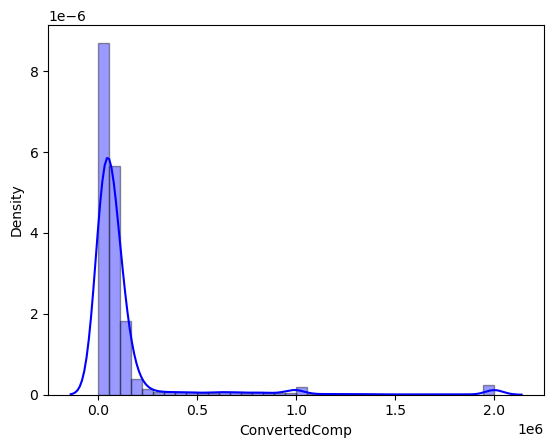

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['ConvertedComp'], hist=True, kde=True,
             bins=int(180/5), color='blue',
             hist_kws={'edgecolor':'black'})

Plot the histogram for the column `ConvertedComp`.


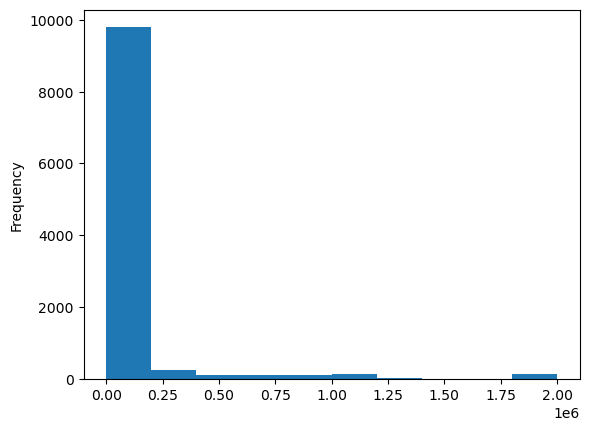

In [4]:
df['ConvertedComp'].plot(kind='hist')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
print(df['ConvertedComp'].median())

57744.0


What is the median Age of survey respondents? 

In [6]:
print(df['Age'].median())

29.0


How many responders identified themselves only as a **Man**?


In [7]:
print(df['Gender'].tolist().count('Man'))

10626


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df2=df.loc[df['Gender']=='Woman']

print(df2.groupby('Gender')['ConvertedComp'].median())

Gender
Woman    57636.0
Name: ConvertedComp, dtype: float64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
print(df['Age'].describe().loc[['min','25%','mean','75%','max']])

min     16.000000
25%     25.000000
mean    30.772394
75%     35.000000
max     99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


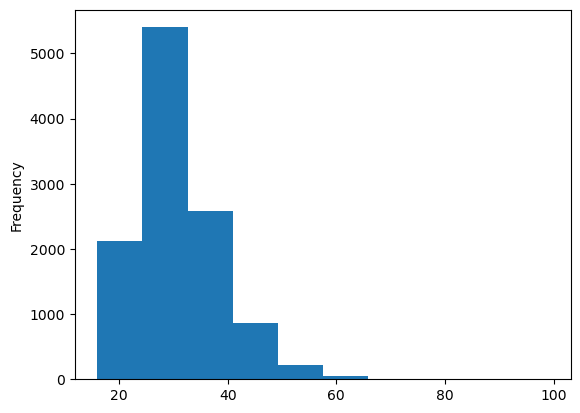

In [10]:
df['Age'].plot(kind='hist')
plt.show()

## Outliers


### Finding outliers


In [13]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11547    130000.0
11548     19880.0
11549    105000.0
11550     80371.0
11551         NaN
Name: ConvertedComp, Length: 11552, dtype: float64

Find out if outliers exist in the column `ConvertedComp` using a box plot?


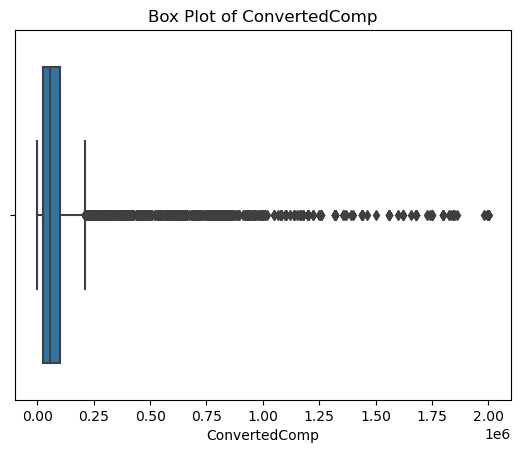

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ConvertedComp' is the column you want to analyze
sns.boxplot(x=df['ConvertedComp'])
plt.xlabel('ConvertedComp')
plt.title('Box Plot of ConvertedComp')
plt.show()

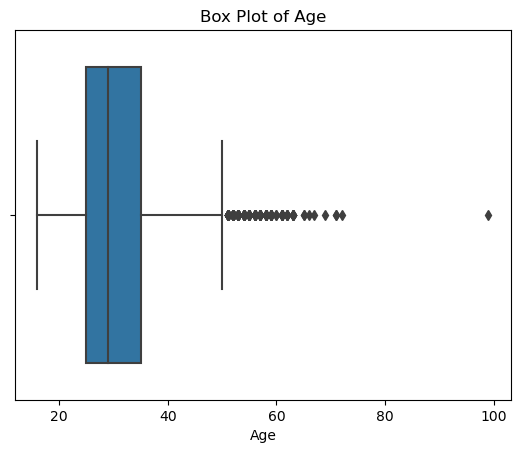

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Age' is the column you want to analyze
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
import numpy as np
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73273.0


Find out the upper and lower bounds.


In [19]:
lower=df['ConvertedComp'].min()
upper=df['ConvertedComp'].max()
print('upper:',upper)
print('lower:',lower)

upper: 2000000.0
lower: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
outliers = (df['ConvertedComp']<(Q1-1.5*IQR)) | (df['ConvertedComp']>(Q3+1.5*IQR))
print(outliers.sum())

888


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
df1=df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]  
print("mean after removing outliers:",df1['ConvertedComp'].mean())
print("meadian after removing outliers:",df1['ConvertedComp'].median())

mean after removing outliers: 59878.65515139199
meadian after removing outliers: 52704.0


## Correlation


In [23]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.012384       0.003173    -0.014384    0.009764   
CompTotal       -0.012384   1.000000       0.001003     0.003533    0.007320   
ConvertedComp    0.003173   0.001003       1.000000     0.020885   -0.034383   
WorkWeekHrs     -0.014384   0.003533       0.020885     1.000000    0.026910   
CodeRevHrs       0.009764   0.007320      -0.034383     0.026910    1.000000   
Age              0.005103   0.007036       0.103652     0.036887   -0.018505   

                    Age  
Respondent     0.005103  
CompTotal      0.007036  
ConvertedComp  0.103652  
WorkWeekHrs    0.036887  
CodeRevHrs    -0.018505  
Age            1.000000  
